In [2]:
##link of data: https://www.kaggle.com/code/karnikakapoor/customer-segmentation-clustering/input
#Importing the Libraries
import numpy as np
import pandas as pd
import datetime
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt, numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering
from matplotlib.colors import ListedColormap
from sklearn import metrics
import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")
np.random.seed(42)

In [3]:
#Loading the dataset
#reading data
Data = pd.read_csv("marketing_campaign.csv", sep="\t")
Data.head()



ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0  04-09-2012       58       635  ...                  7             0   
1  08-03-2014       38        11  ...                  5             0   
2  21-08-2013       26       426  ...                  4             0   
3  10-02-2014       26        11  ...                  6             0   
4  19-01-2014       94       173  ...                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  
0              3         11         1  
1              3         11         0  
2              3         11         0  
3              3         11         0  
4              3         11         0  

[5 rows x 29 columns]

In [4]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [5]:
#checking missing values
null_values = Data.isnull().sum()
print(null_values)

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64


In [6]:
#checking duplicated values
duplicate_values = Data[Data.duplicated()]
print(duplicate_values)

Empty DataFrame
Columns: [ID, Year_Birth, Education, Marital_Status, Income, Kidhome, Teenhome, Dt_Customer, Recency, MntWines, MntFruits, MntMeatProducts, MntFishProducts, MntSweetProducts, MntGoldProds, NumDealsPurchases, NumWebPurchases, NumCatalogPurchases, NumStorePurchases, NumWebVisitsMonth, AcceptedCmp3, AcceptedCmp4, AcceptedCmp5, AcceptedCmp1, AcceptedCmp2, Complain, Z_CostContact, Z_Revenue, Response]
Index: []

[0 rows x 29 columns]


<AxesSubplot:>

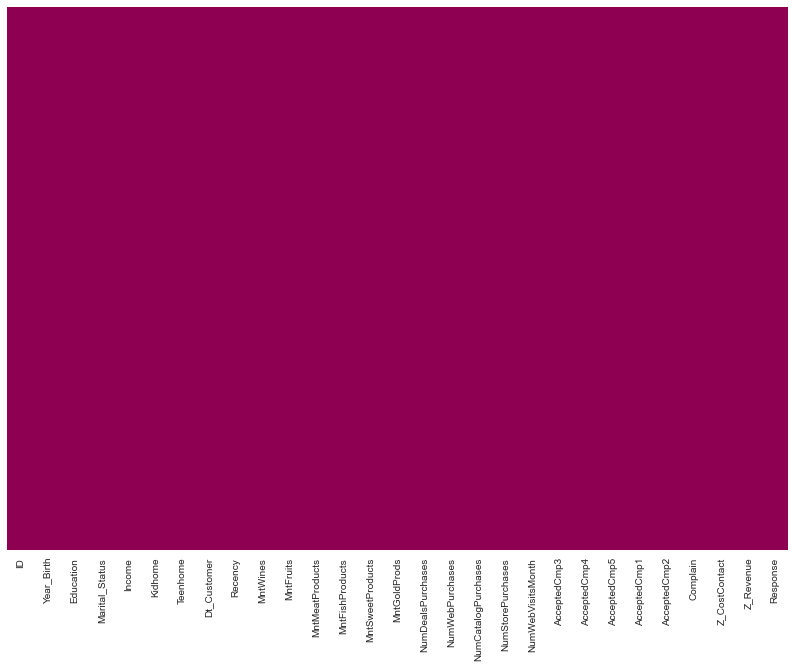

In [7]:
##rectifying missing values
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
df = pd.DataFrame(Data)
columns_to_fill = ['Income']
fill_cols = [col for col in columns_to_fill]
itr_imputer = IterativeImputer(initial_strategy='median', min_value=0, random_state=100)
df[fill_cols] = itr_imputer.fit_transform(df[fill_cols])
plt.figure(figsize = (14,10))
sns.heatmap(df.isnull(), cmap= 'PiYG', cbar=False, yticklabels=False, xticklabels=df.columns)

In [8]:
# feature engineering :  
#We are adding new columns to data
Data["Age"] = 2023-Data["Year_Birth"]
Data["Children"]=Data["Kidhome"]+Data["Teenhome"]
#REPLACING
Data["Education"]=Data["Education"].replace({"Basic":"Undergraduate","2n Cycle":"Undergraduate", "Graduation":"Graduate", "Master":"Postgraduate", "PhD":"Postgraduate"})
#renaming
Data=Data.rename(columns={"MntWines": "Wines","MntFruits":"Fruits","MntMeatProducts":"Meat","MntFishProducts":"Fish","MntSweetProducts":"Sweets","MntGoldProds":"Gold"})
#Feature pertaining parenthood
Data["Is_Parent"] = np.where(Data.Children> 0, 1, 0)
#Dropping some of the redundant features
to_drop = ["Marital_Status", "Dt_Customer", "Z_CostContact", "Z_Revenue", "Year_Birth", "ID", "Kidhome", "Teenhome", "AcceptedCmp1", "AcceptedCmp2", "AcceptedCmp3", "AcceptedCmp4", "AcceptedCmp5"]
Data = Data.drop(to_drop, axis=1)
Data.head()


Education   Income  Recency  Wines  Fruits  Meat  Fish  Sweets  Gold  \
0      Graduate  58138.0       58    635      88   546   172      88    88   
1      Graduate  46344.0       38     11       1     6     2       1     6   
2      Graduate  71613.0       26    426      49   127   111      21    42   
3      Graduate  26646.0       26     11       4    20    10       3     5   
4  Postgraduate  58293.0       94    173      43   118    46      27    15   

   NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
0                  3                8                   10                  4   
1                  2                1                    1                  2   
2                  1                8                    2                 10   
3                  2                2                    0                  4   
4                  5                5                    3                  6   

   NumWebVisitsMonth  Complain  Response  Age  Children  Is_Parent  
0                  7         0         1   66         0          0  
1                  5         0         0   69         2          1  
2                  4         0         0   58         0          0  
3                  6         0         0   39         1          1  
4                  5         0         0   42         1          1

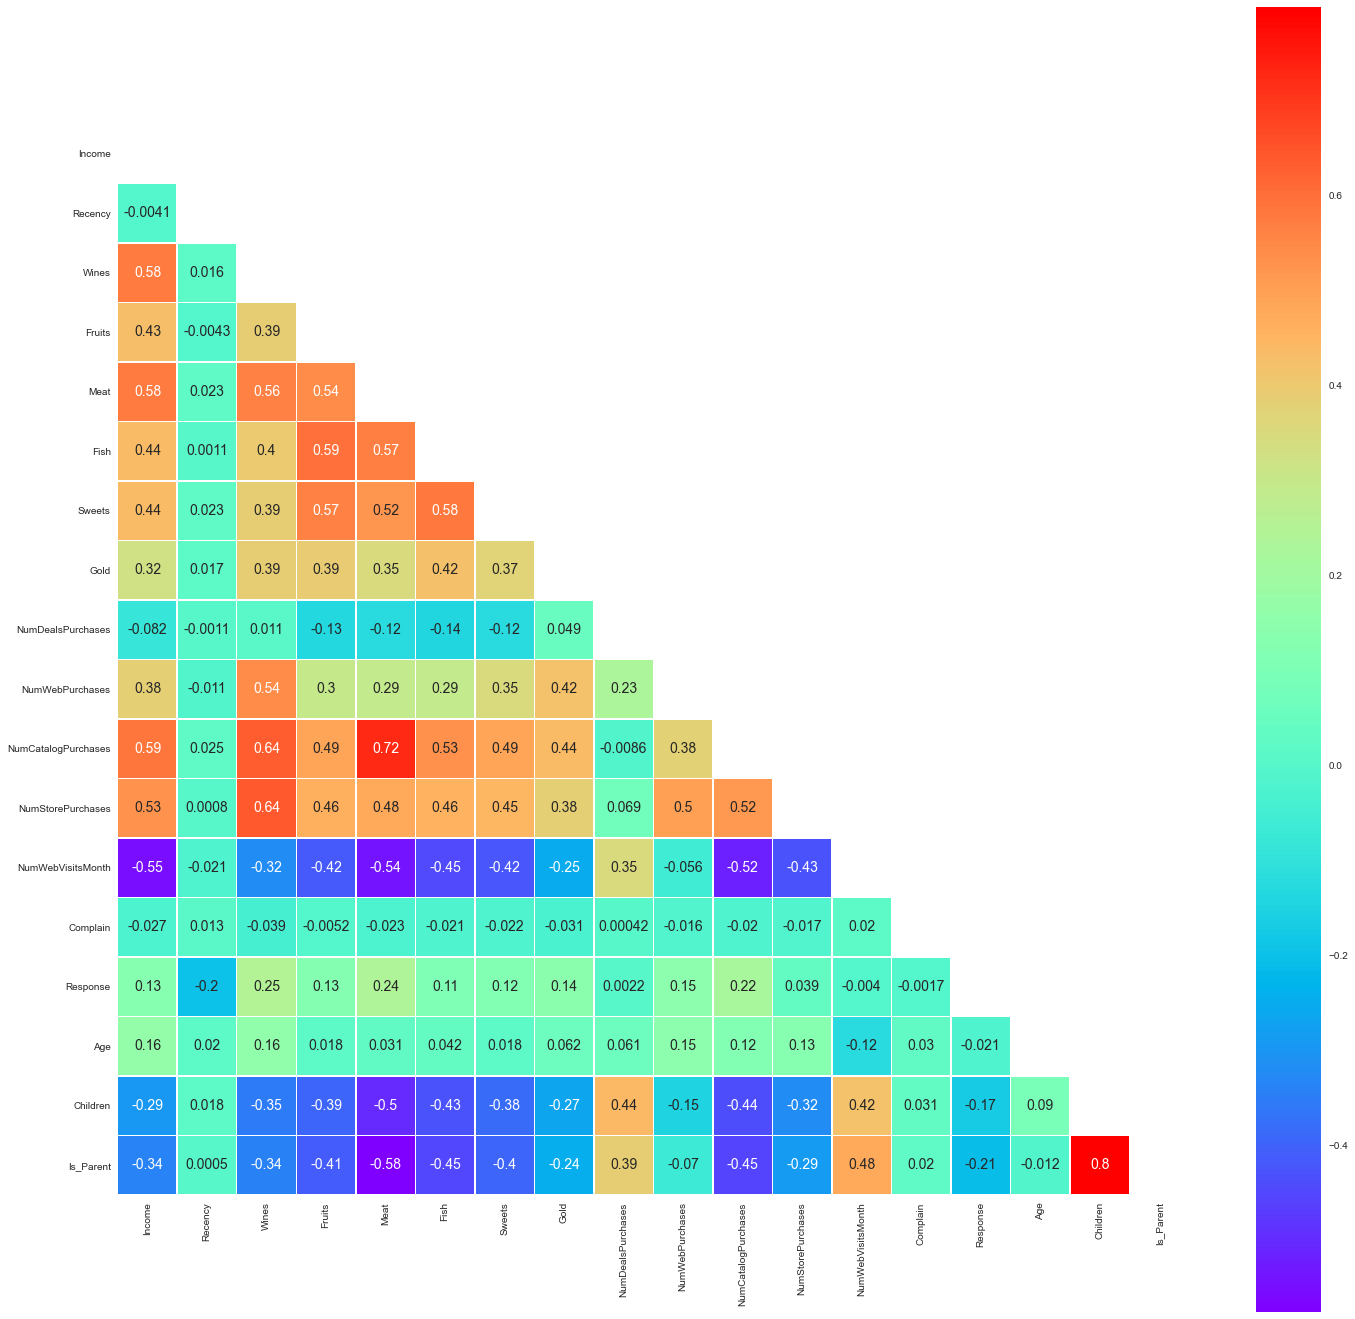

In [9]:
## data analysis
##correlations: high correlations are in red
correlation = Data.corr(method='pearson')
fig, ax = plt.subplots()
ax.figure.set_size_inches(24, 24)
# a mask for the upper triangle
mask = np.triu(np.ones_like(correlation, dtype=np.bool))
# plots the coorelations
sns.heatmap(correlation, cmap='rainbow', mask=mask, square=True, linewidths=.5, annot=True, annot_kws={'size':14})
plt.show()

Reletive Plot Of Some Selected Features: A Data Subset


<Figure size 576x396 with 0 Axes>

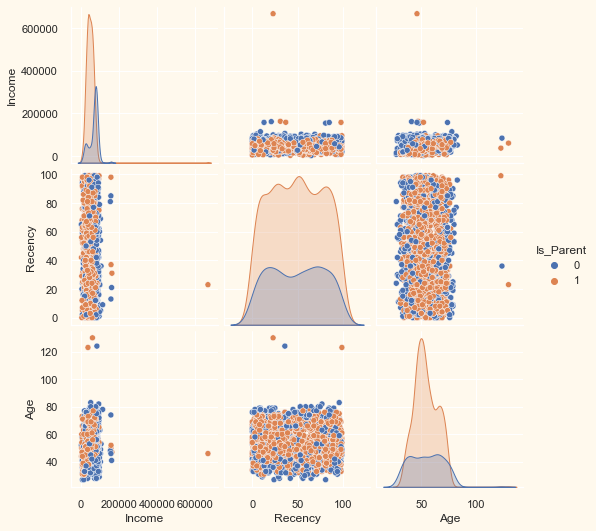

In [10]:
## data analysis
#plotting some selected features 
#Setting up colors prefrences
sns.set(rc={"axes.facecolor":"#FFF9ED","figure.facecolor":"#FFF9ED"})
pallet = ["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"]
cmap = colors.ListedColormap(["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"])
#Plotting following features
To_Plot = ["Income", "Recency", "Age", "Is_Parent"]
print("Reletive Plot Of Some Selected Features: A Data Subset")
plt.figure()
sns.pairplot(Data[To_Plot], hue= "Is_Parent")
#Taking hue 
plt.show()

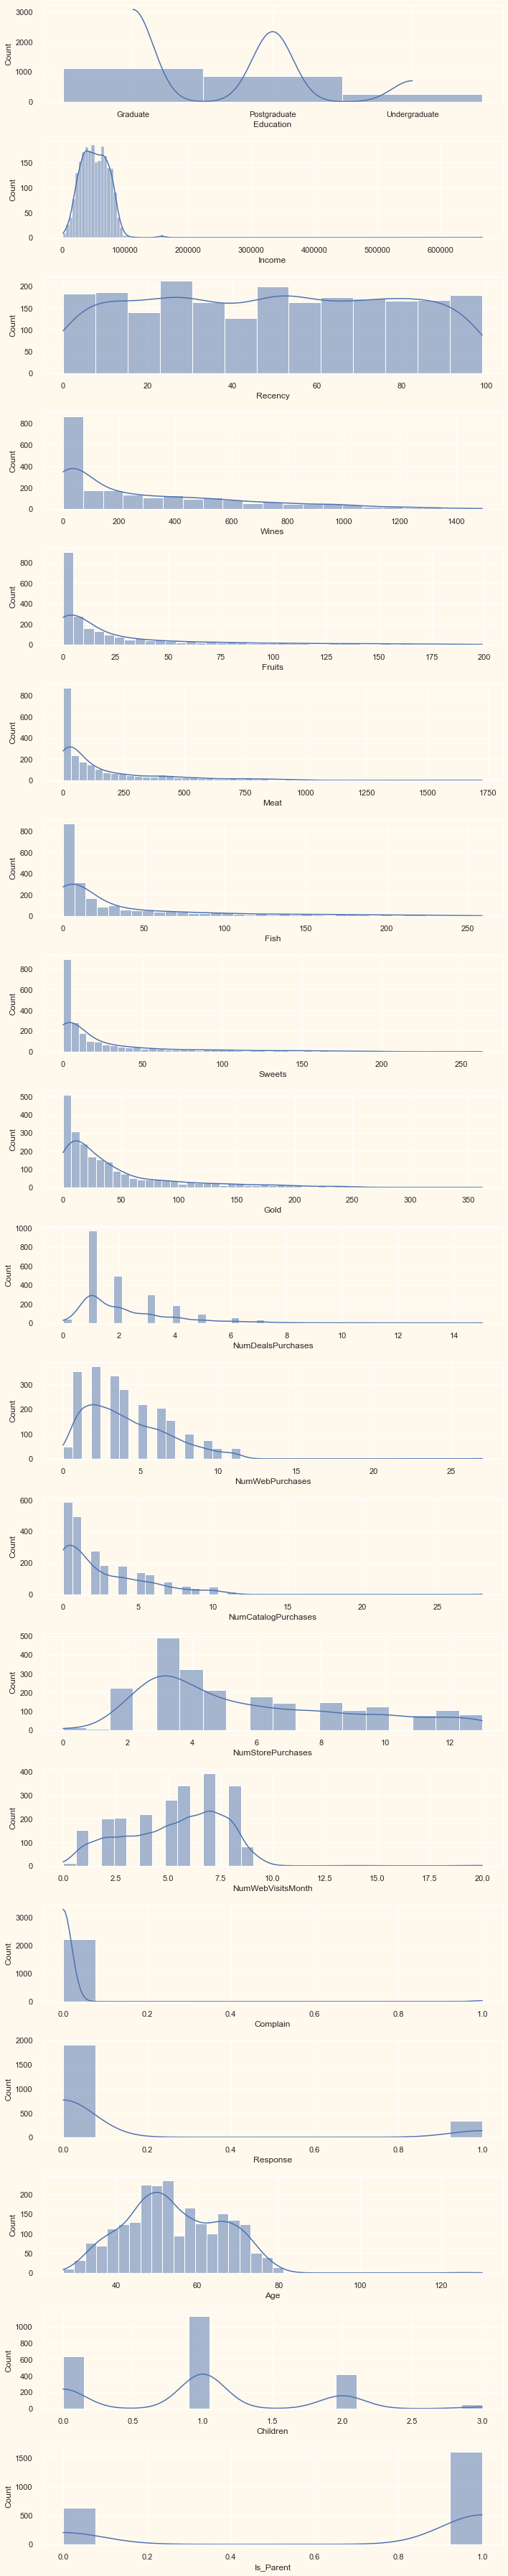

In [11]:
## data analysis: histograms
fill_cols = [col for col in Data.columns]
fig1, ax = plt.subplots(len(fill_cols),1,figsize=(10,50))
for i, col in enumerate(Data):
    ##FOR NOT HAVING LINE REMOVE kde = True
    sns.histplot(Data[col], kde=True, ax=ax[i])
fig1.tight_layout()
plt.show()

In [12]:
## data analysis: categorial data to numerical data
CATEGORIAL_DATA = (Data.dtypes == 'object')
object_cols = list(CATEGORIAL_DATA[CATEGORIAL_DATA].index)
print("Categorical Column=>", object_cols)

Categorical Column=> ['Education']


In [13]:
#converting categorial data to numerical data
LE=LabelEncoder()
for i in object_cols:
    Data[i]=Data[[i]].apply(LE.fit_transform)
    
print("All features are numerical")

All features are numerical


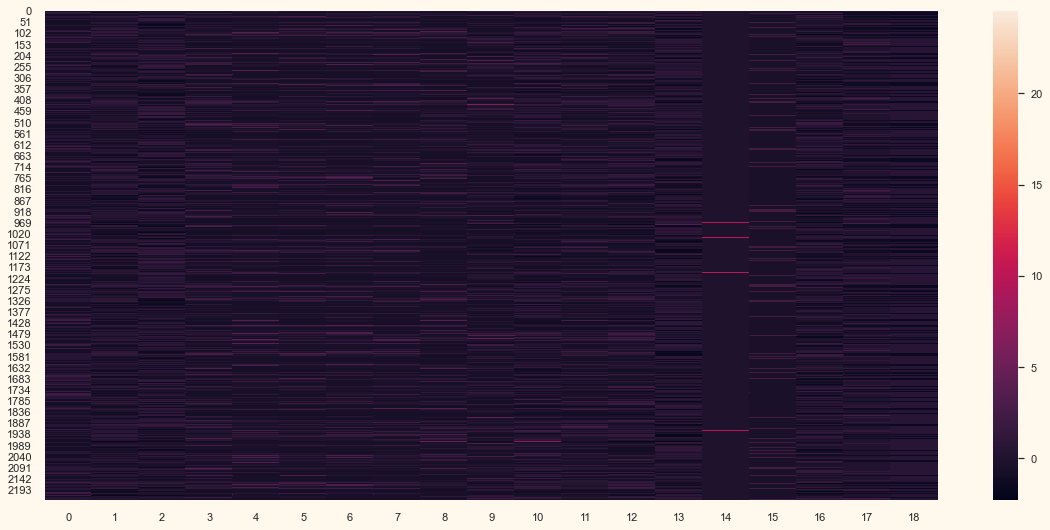

In [14]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(Data)
plt.figure(figsize=(20,9))
sns.heatmap(scaled_data)
plt.show()
scaled_data = pd.DataFrame(scaled_data)


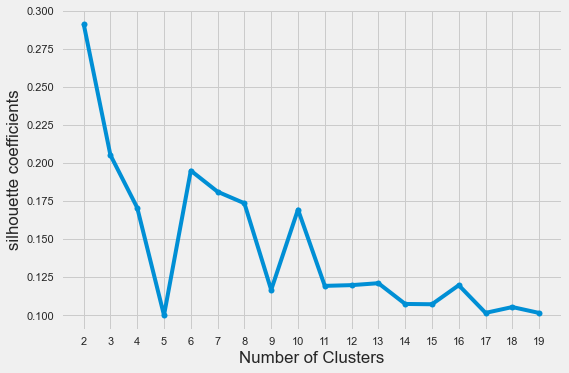

In [15]:
## selecting cluster number, max in the curve is the prefered cluster numebr
from sklearn.metrics import silhouette_score
##The first step is to randomly choose k centroids, where k is number of clusters
##The random initialization step causes the k-means algorithm to be  varied if you run the same algorithm twice on the same data
kmeans_set = {"init":"random", "max_iter":200,"random_state":42}
## next step we should define the number of clusters by a method here I used silhouette_coefficients.
silhouette_coefficients =[]
for k in range(2,len(fill_cols)+1):
    kmeans=KMeans(n_clusters=k,**kmeans_set).fit(scaled_data)
    score=silhouette_score(scaled_data,kmeans.labels_)
    silhouette_coefficients.append(score)
plt.style.use("fivethirtyeight")
plt.plot(range(2,len(fill_cols)+1),silhouette_coefficients,marker='o')
plt.xticks(range(2,len(fill_cols)+1))
plt.xlabel("Number of Clusters")
plt.ylabel("silhouette coefficients")
plt.show()


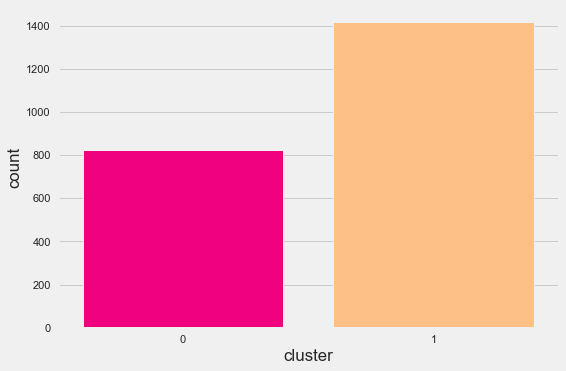

In [16]:
## method: K-mean
kmeans = KMeans(n_clusters=2,**kmeans_set).fit(scaled_data)
cluster_centers = pd.DataFrame(data = kmeans.cluster_centers_, columns = [Data.columns])
cluster_centers = scaler.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data = cluster_centers, columns = [Data.columns])
labels = kmeans.labels_
data_cluster_with_kmean = pd.concat([Data, pd.DataFrame({'cluster': labels})], axis = 1)
ax = sns.countplot(data=data_cluster_with_kmean, x='cluster', palette='Accent_r', saturation=1, linewidth = 1)


Text(14.315430614909786, 0.5, 'Income')

<Figure size 1080x576 with 0 Axes>

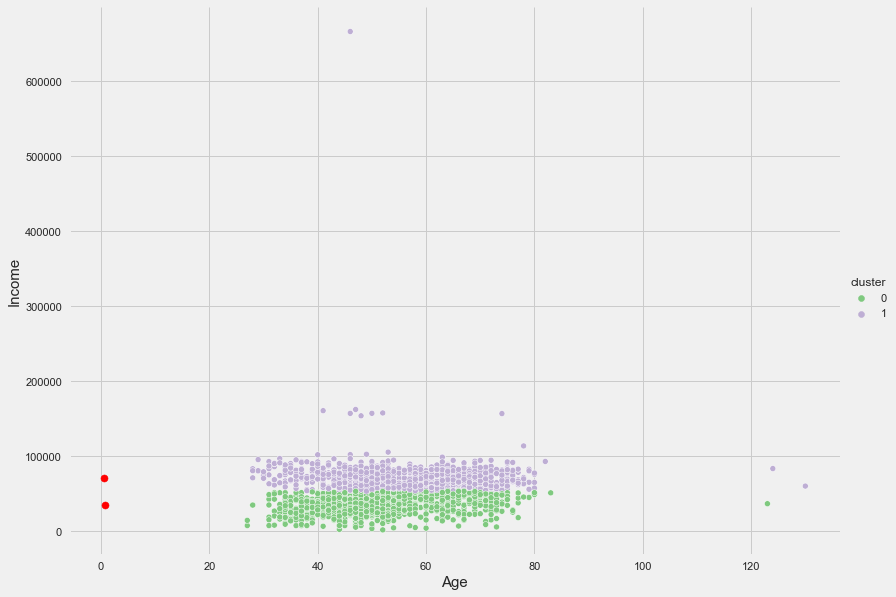

In [17]:
##visualizing k-mean results on original data
kmeans = KMeans(n_clusters=2,init= "random", random_state = 1).fit(Data)
centroids = kmeans.cluster_centers_
plt.figure(figsize=(15,8))
Data_kmean = Data.copy()
Data_kmean['cluster'] = kmeans.labels_
sns.relplot(data = Data_kmean ,x='Age' , y  ='Income', hue='cluster', palette='Accent' ,kind='scatter', height=8.27, aspect = 11.7/8.27)
plt.scatter(centroids[:, 0], centroids[:,1], c='red', s=50)
plt.xlabel("Age",fontsize=15)
plt.ylabel("Income",fontsize=15)

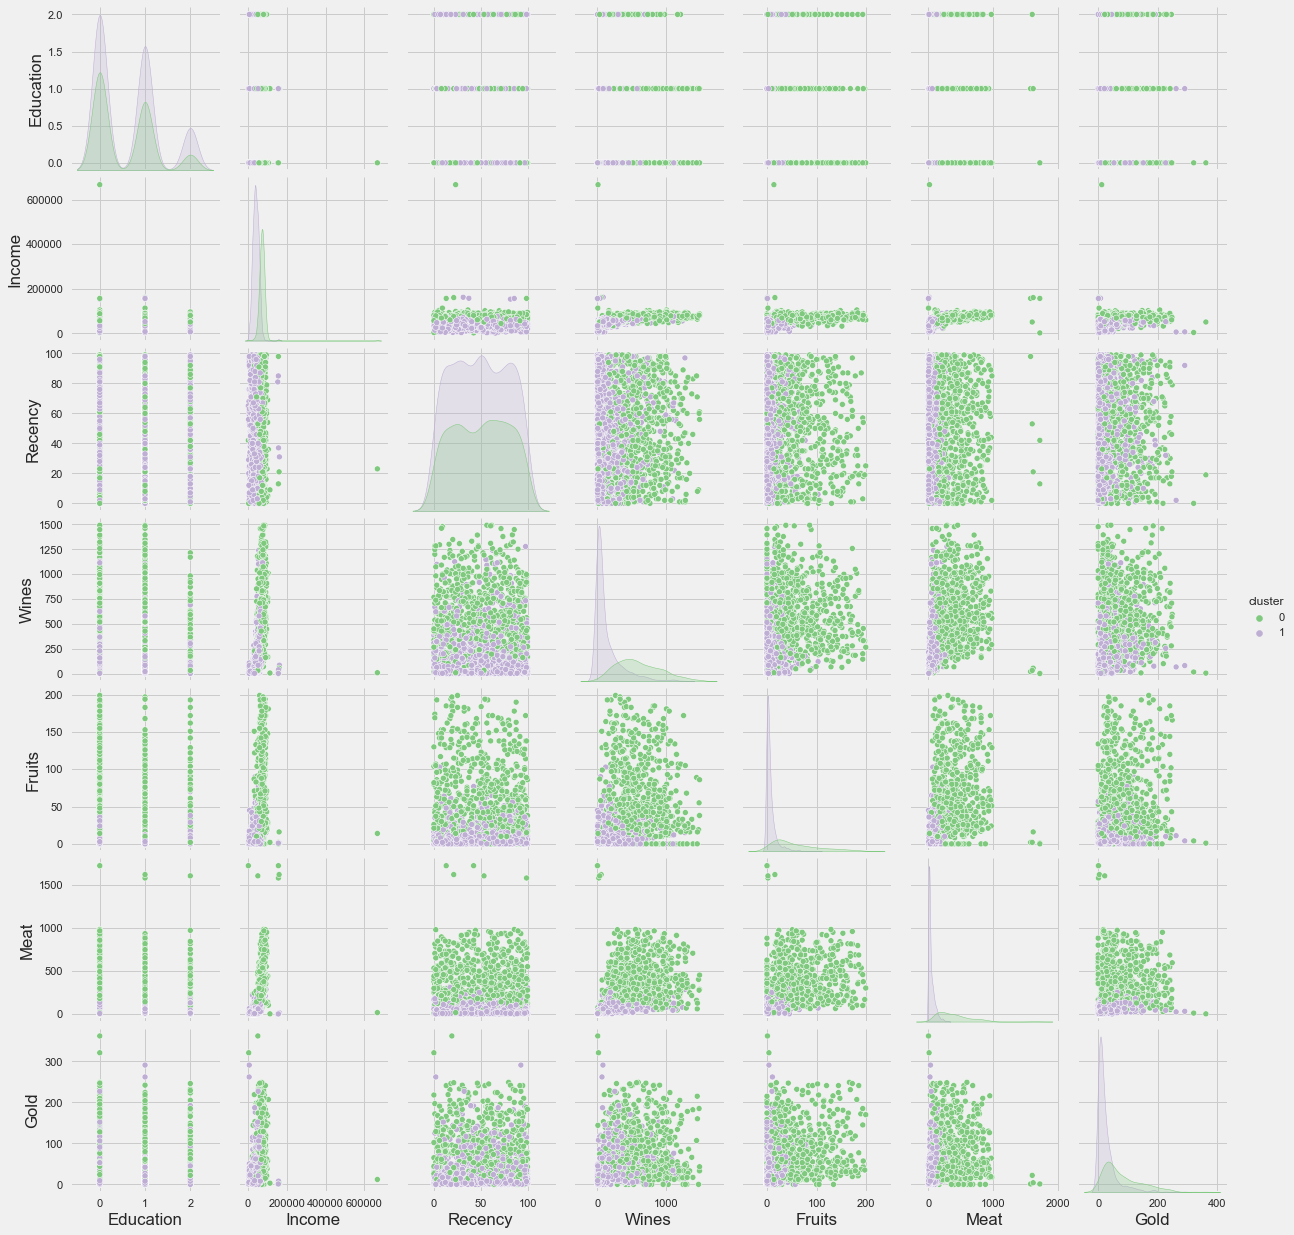

In [18]:
# visualizing K-mean for some or all columns
best_cols = ["Education", "Income", "Recency","Wines", "Fruits", "Meat","Gold","cluster"]
sns.pairplot( data_cluster_with_kmean[ best_cols ], hue="cluster",palette='Accent')  

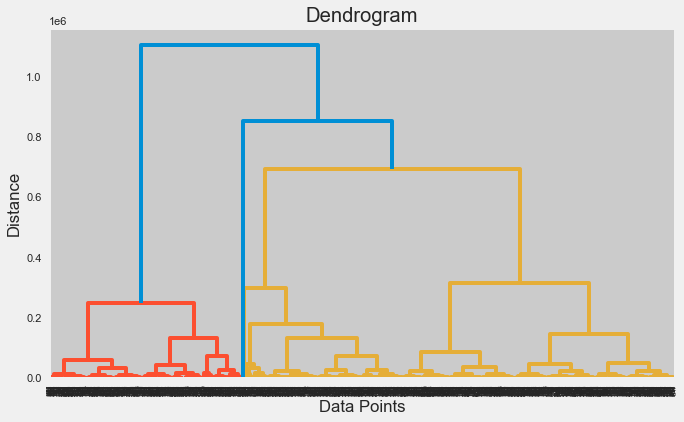

In [19]:
## method: AgglomerativeClustering
# we select number of clusters based on analysis
from scipy.cluster.hierarchy import dendrogram, linkage
# Compute the linkage matrix
linkage_matrix = linkage(Data, method='ward')
# Plot the dendrogram
plt.figure(figsize=(10, 6))
dendrogram(linkage_matrix)
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.title('Dendrogram')
plt.show()



In [20]:
from sklearn.cluster import AgglomerativeClustering
# Initialize the Agglomerative Clustering model
agg_clustering = AgglomerativeClustering(n_clusters=5)
# Fit the Agglomerative Clustering model to the data
agg_clustering.fit(Data)
# Extract the cluster labels
labels = agg_clustering.labels_
# Print the number of clusters
n_clusters = len(np.unique(labels))
print(f"Number of clusters: {n_clusters}")

Number of clusters: 5


Text(14.315430614909786, 0.5, 'Income')

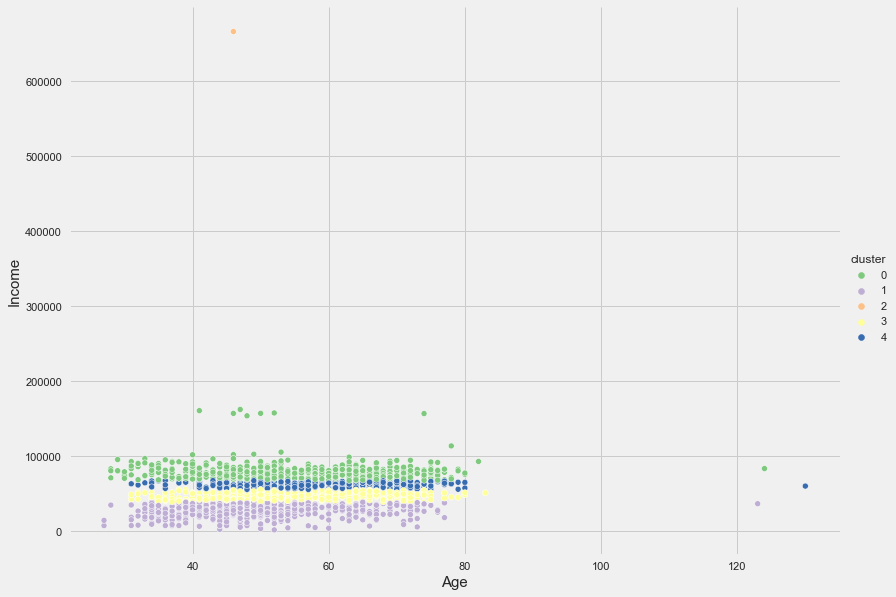

In [21]:
##visualizing AgglomerativeClustering results on original data
data_agg_clustering = Data.copy()
data_agg_clustering['cluster'] = agg_clustering.labels_
sns.relplot(data = data_agg_clustering ,x='Age' , y  ='Income', hue='cluster', palette='Accent' ,kind='scatter', height=8.27, aspect = 11.7/8.27)
#plt.scatter(centroids[:, 0], centroids[:,1], c='red', s=50)
plt.xlabel("Age",fontsize=15)
plt.ylabel("Income",fontsize=15)
plt.xlabel("Age",fontsize=15)
plt.ylabel("Income",fontsize=15)

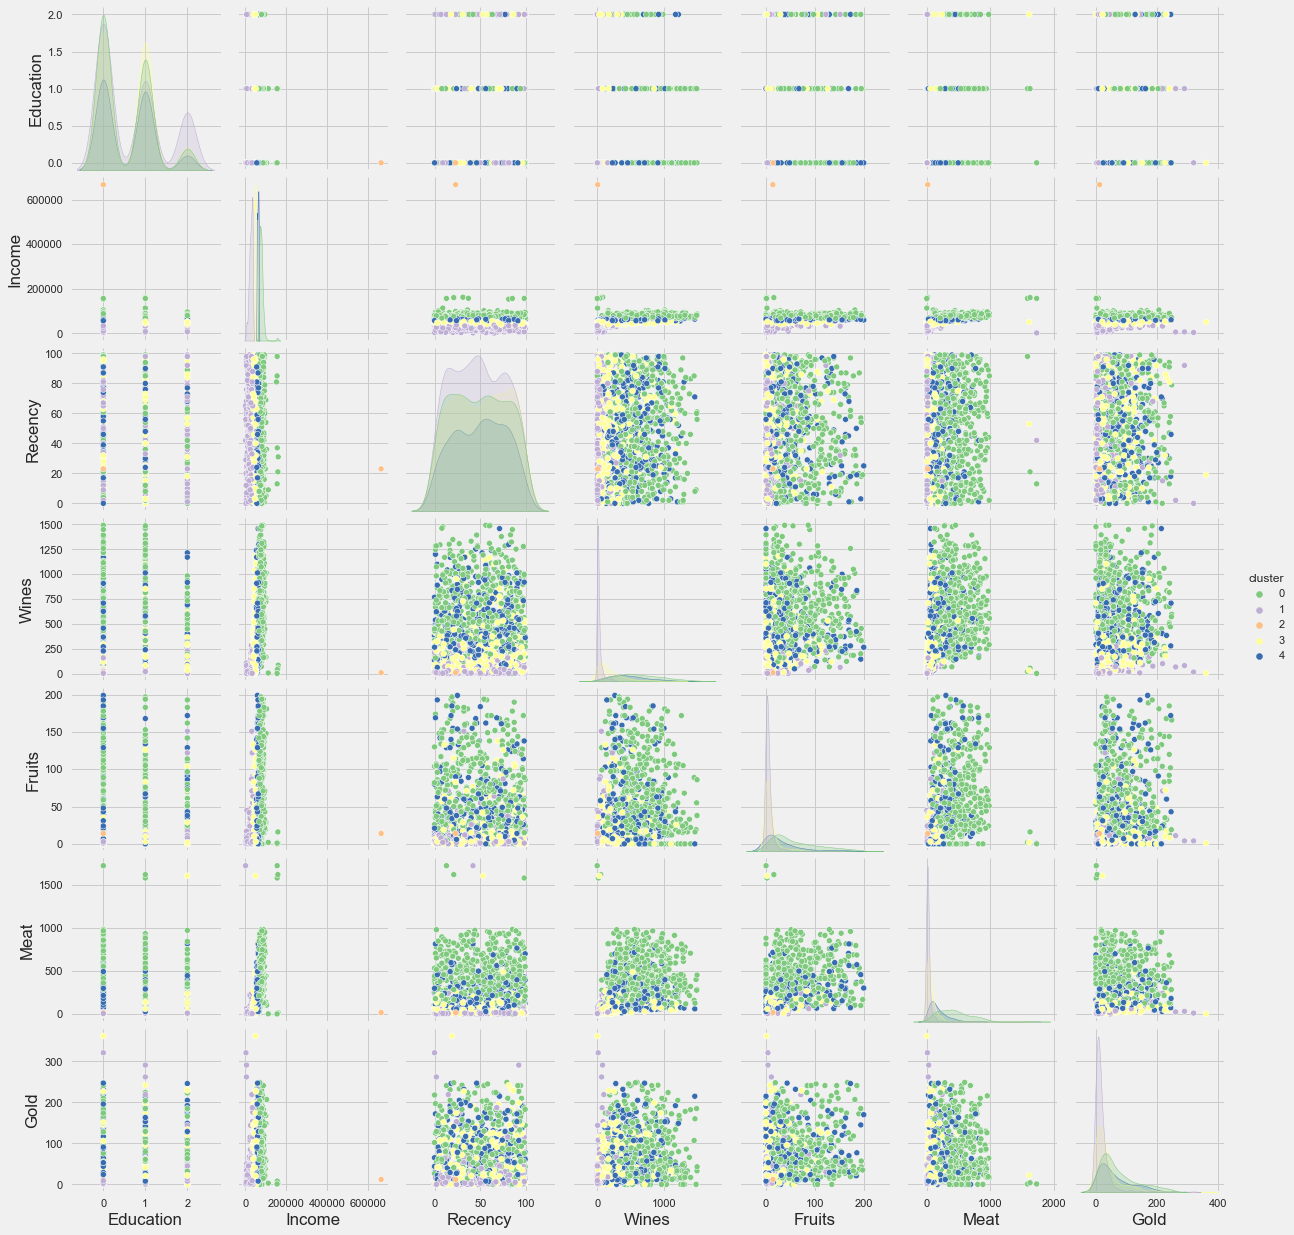

In [22]:
##visualizing AgglomerativeClustering results on original data of some or all columns
best_cols = ["Education", "Income", "Recency","Wines", "Fruits", "Meat","Gold","cluster"]
sns.pairplot( data_agg_clustering[ best_cols ], hue="cluster",palette='Accent') 

Text(14.315430614909786, 0.5, 'Income')

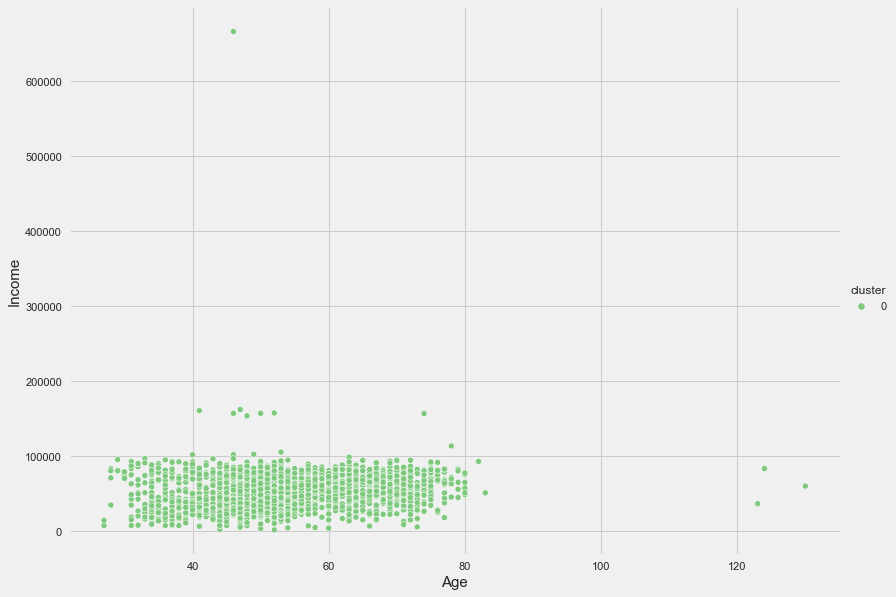

In [23]:
## method: spectral clustering method
from sklearn.cluster import SpectralClustering

spectral = SpectralClustering(n_clusters=2).fit(Data)  # Specify the number of desired clusters

# Fit the SpectralClustering model to the data
data_Spectral = Data.copy()
data_Spectral['cluster'] = spectral.labels_
sns.relplot(data = data_Spectral ,x='Age' , y  ='Income', hue='cluster', palette='Accent' ,kind='scatter', height=8.27, aspect = 11.7/8.27)
plt.xlabel("Age",fontsize=15)
plt.ylabel("Income",fontsize=15)


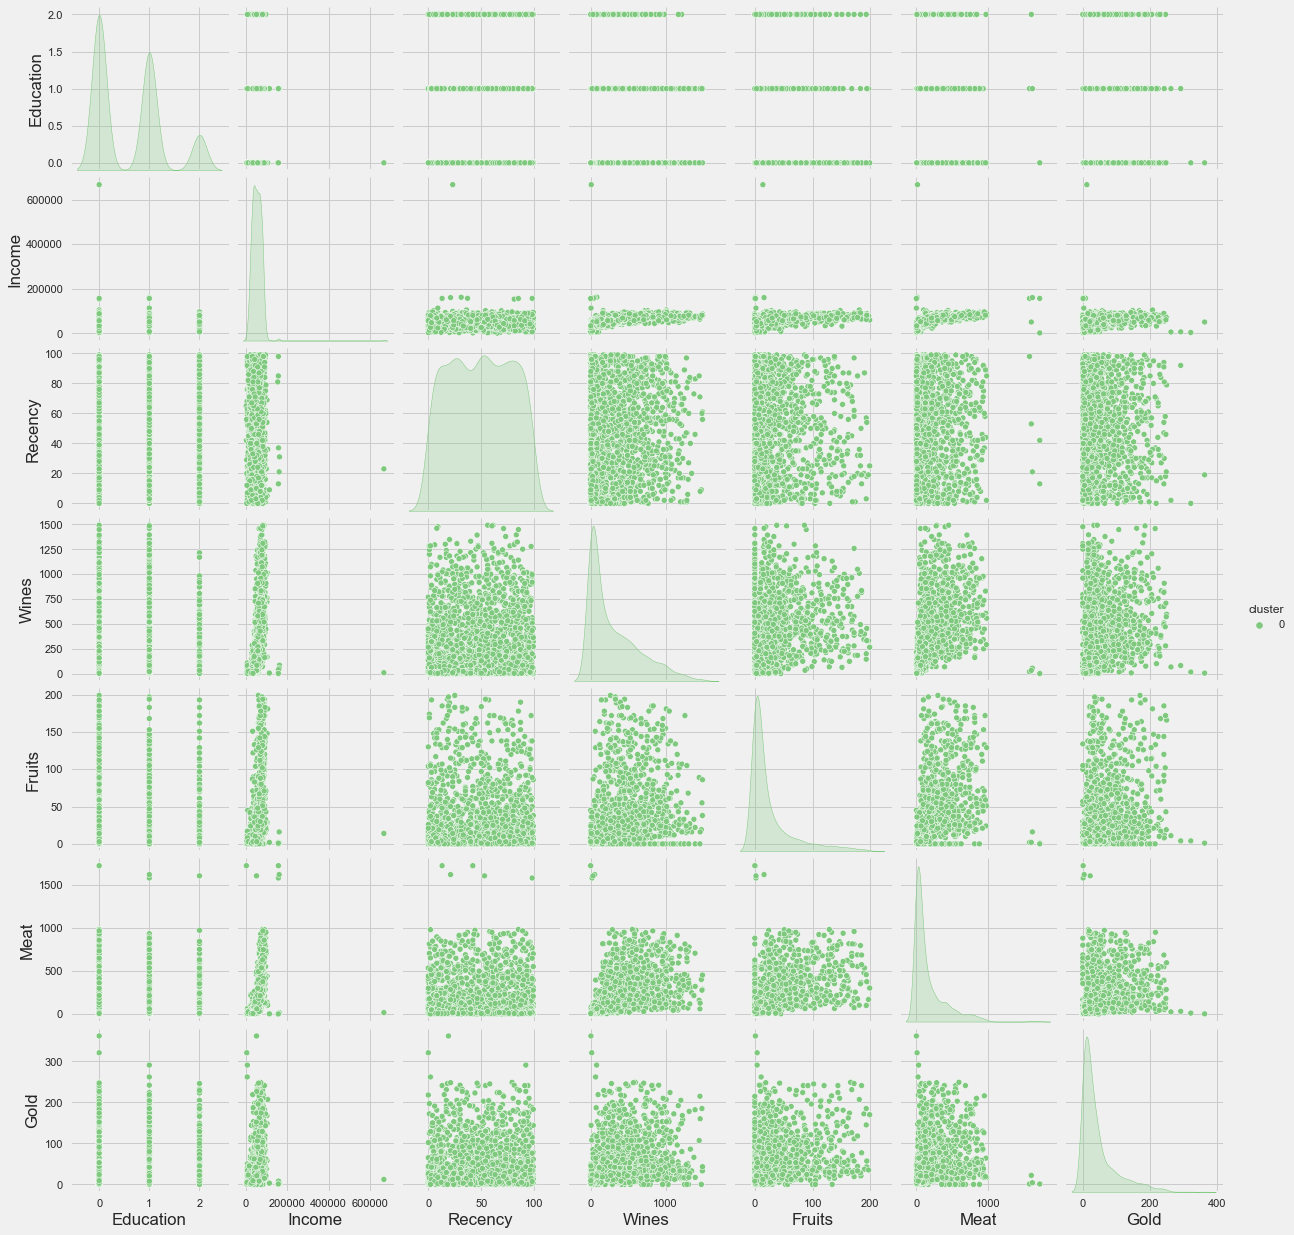

In [24]:
##visualizing spectral results on original data of all or some columns
best_cols = ["Education", "Income", "Recency","Wines", "Fruits", "Meat","Gold","cluster"]
sns.pairplot( data_Spectral[ best_cols ], hue="cluster",palette='Accent') 

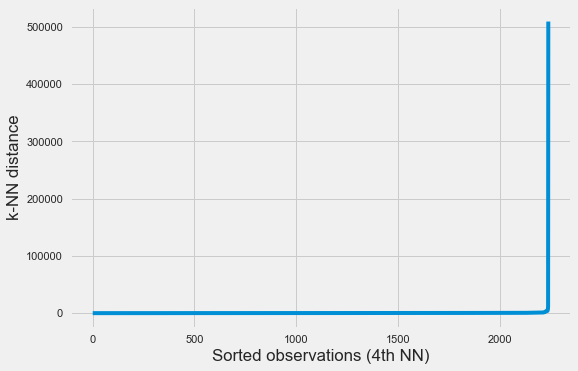

In [25]:
## method: dbscan
##determining eps parameter
from sklearn.neighbors import NearestNeighbors
nbrs = NearestNeighbors(n_neighbors = 5).fit(Data)
# Find the k-neighbors of a point to get eps.
neigh_dist, neigh_ind = nbrs.kneighbors(Data)
# sort the neighbor distances (lengths to points) in ascending order
# axis = 0 represents sort along first axis i.e. sort along row
sort_neigh_dist = np.sort(neigh_dist, axis = 0)
k_dist = sort_neigh_dist[:, 4]
plt.plot(k_dist)
plt.ylabel("k-NN distance")
plt.xlabel("Sorted observations (4th NN)")
plt.show()

In [26]:
## method: dbscan
from sklearn.cluster import DBSCAN
# Initialize the DBSCAN model
dbscan = DBSCAN(eps=2100, min_samples=100)
# Fit the DBSCAN model to the data
dbscan.fit(Data)
# Extract the cluster labels
labels = dbscan.labels_
# Print the number of clusters
n_clusters = len(np.unique(labels))
print(f"Number of clusters: {n_clusters}")




Number of clusters: 2


Text(14.577494361348528, 0.5, 'Income')

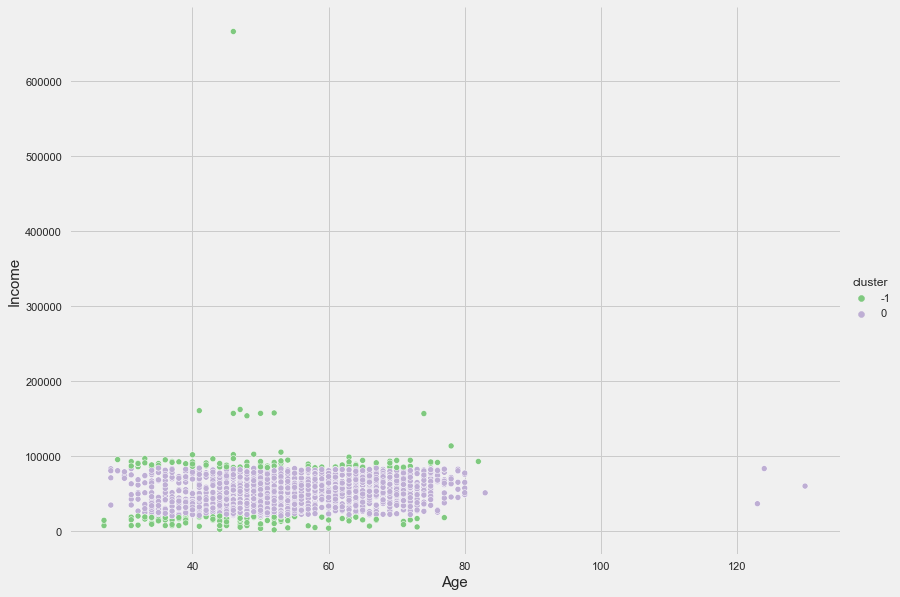

In [27]:
data_dbscan = Data.copy()
data_dbscan['cluster'] = dbscan.labels_
sns.relplot(data = data_dbscan ,x='Age' , y  ='Income', hue='cluster', palette='Accent' ,kind='scatter', height=8.27, aspect = 11.7/8.27)
#plt.scatter(centroids[:, 0], centroids[:,1], c='red', s=50)
plt.xlabel("Age",fontsize=15)
plt.ylabel("Income",fontsize=15)
plt.xlabel("Age",fontsize=15)
plt.ylabel("Income",fontsize=15)

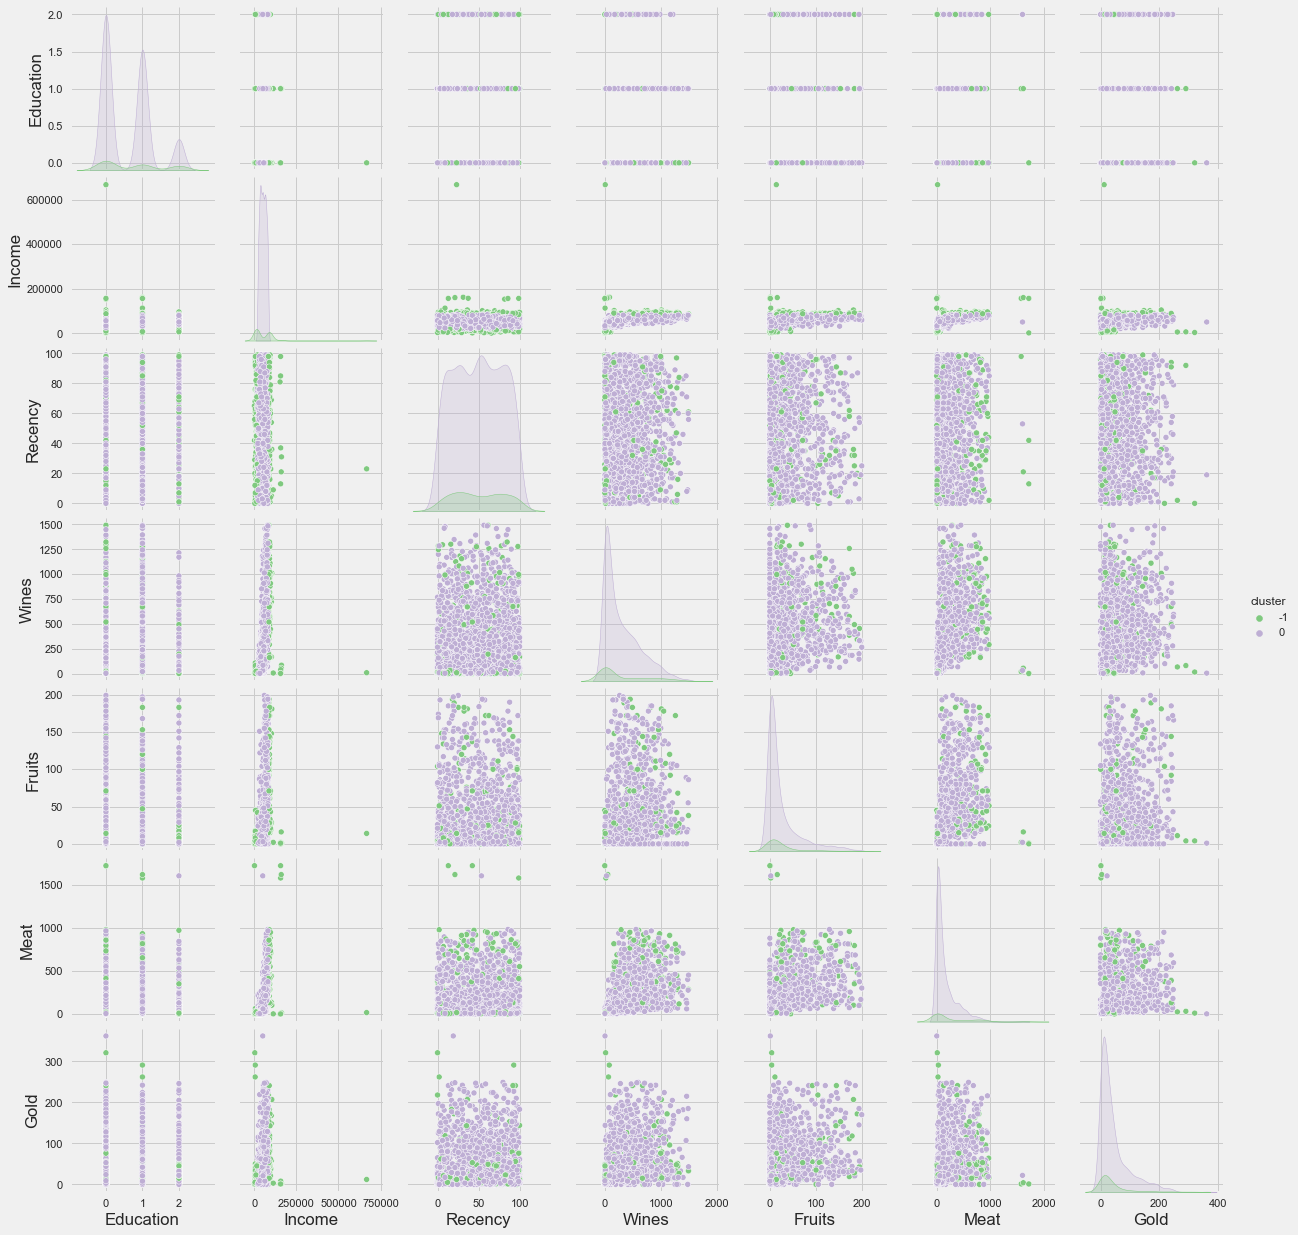

In [28]:
##visualizing dbscan results on original data of some coulumns
best_cols = ["Education", "Income", "Recency","Wines", "Fruits", "Meat","Gold","cluster"]
sns.pairplot(data_dbscan[best_cols], hue="cluster",palette='Accent') 

In [29]:
## method: AffinityPropagation
from sklearn.cluster import AffinityPropagation
from sklearn.datasets import make_blobs

# Generate sample data

# Initialize the AffinityPropagation model
affinity_propagation = AffinityPropagation(damping=0.84, preference=None)

# Fit the AffinityPropagation model to the data
affinity_propagation = affinity_propagation.fit(Data)

# Get the cluster labels and cluster centers
labels = affinity_propagation.labels_
cluster_centers = affinity_propagation.cluster_centers_
# Print the number of identified clusters
n_clusters = len(cluster_centers)
print(f"Number of clusters: {n_clusters}")


Number of clusters: 22


Text(14.743468067426406, 0.5, 'Income')

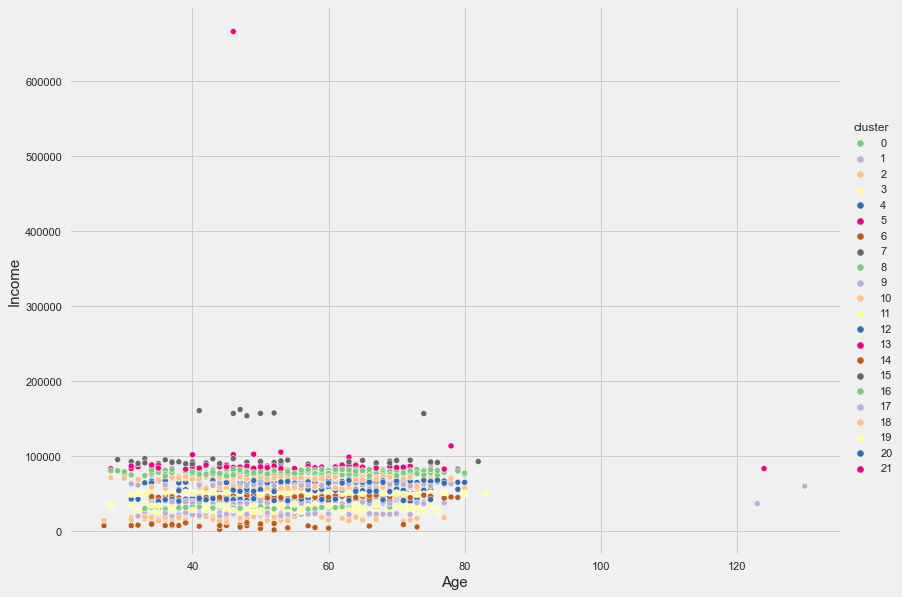

In [30]:
##visualizing affinity_propagation results on original data
data_affinity_propagation = Data.copy()
data_affinity_propagation['cluster'] = affinity_propagation.labels_
sns.relplot(data = data_affinity_propagation ,x='Age' , y  ='Income', hue='cluster', palette='Accent' ,kind='scatter', height=8.27, aspect = 11.7/8.27)
#plt.scatter(centroids[:, 0], centroids[:,1], c='red', s=50)
plt.xlabel("Age",fontsize=15)
plt.ylabel("Income",fontsize=15)
plt.xlabel("Age",fontsize=15)
plt.ylabel("Income",fontsize=15)

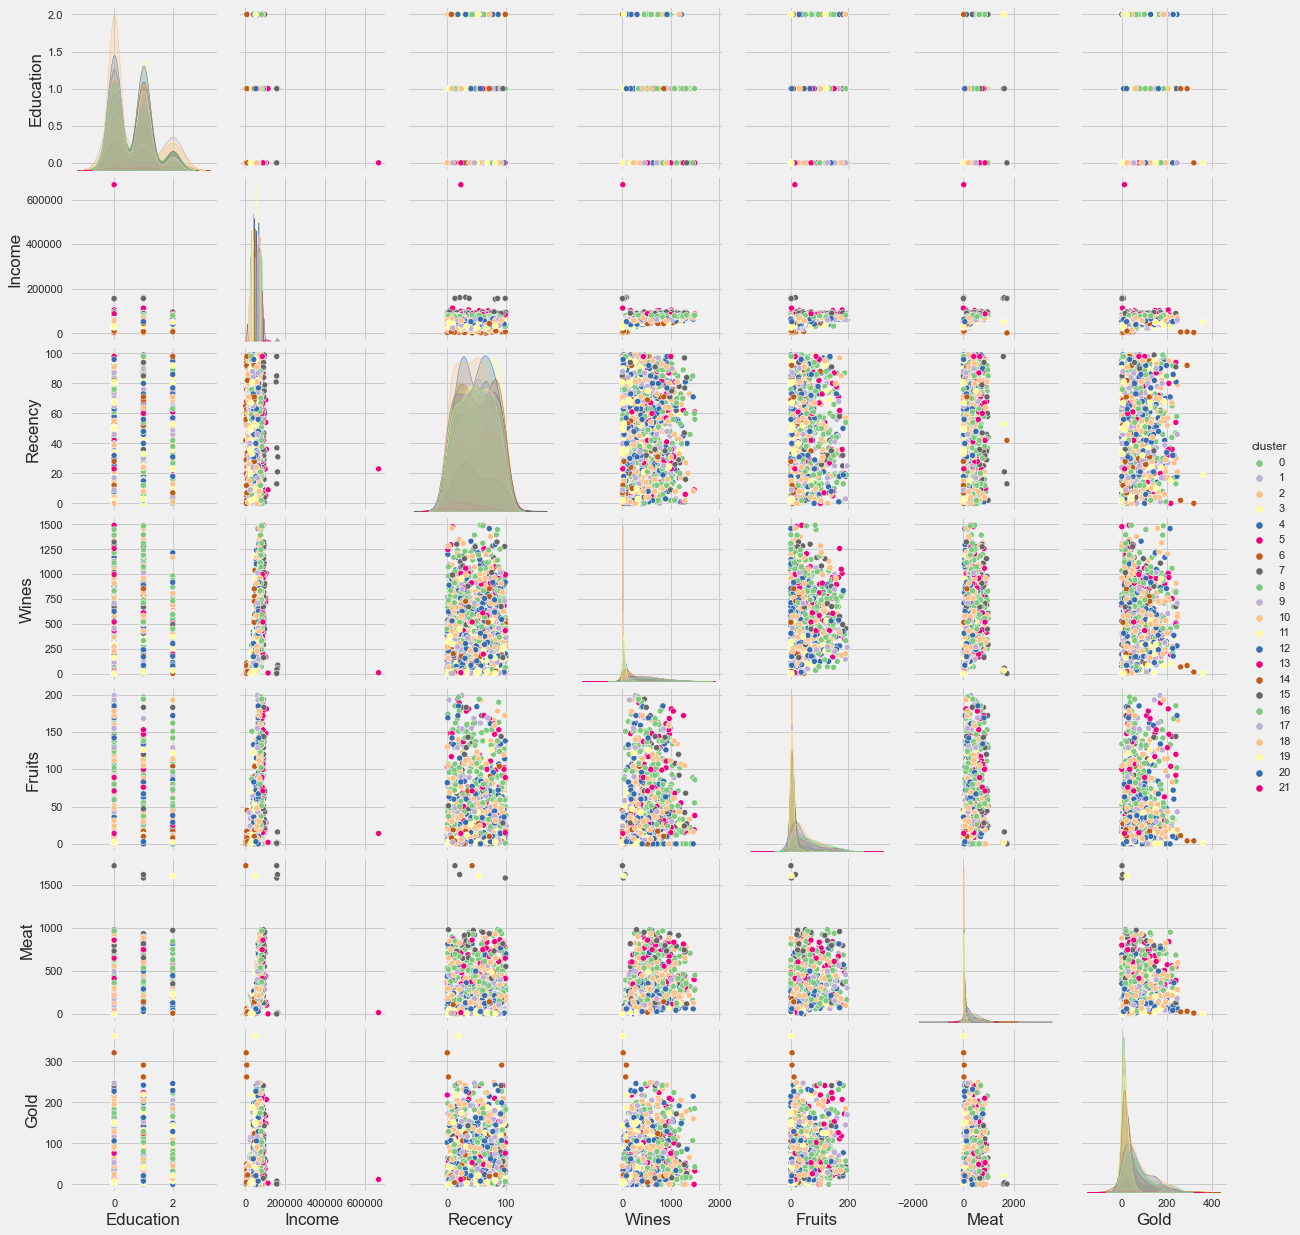

In [31]:
##visualizing affinity_propagation results on original data of all or some columns
best_cols = ["Education", "Income", "Recency","Wines", "Fruits", "Meat","Gold","cluster"]
sns.pairplot(data_affinity_propagation[ best_cols ], hue="cluster",palette='Accent') 

In [53]:
# method OPTICS
from sklearn.cluster import OPTICS
optics = OPTICS(min_samples=5, xi=0.05, min_cluster_size=0.1)

# Fit the OPTICS model to the data
optics.fit(Data)

# Extract the cluster labels
labels = optics.labels_

# Print the number of clusters
n_clusters = len(np.unique(labels))
print(f"Number of clusters: {n_clusters}")


Number of clusters: 4


Text(14.577494361348528, 0.5, 'Income')

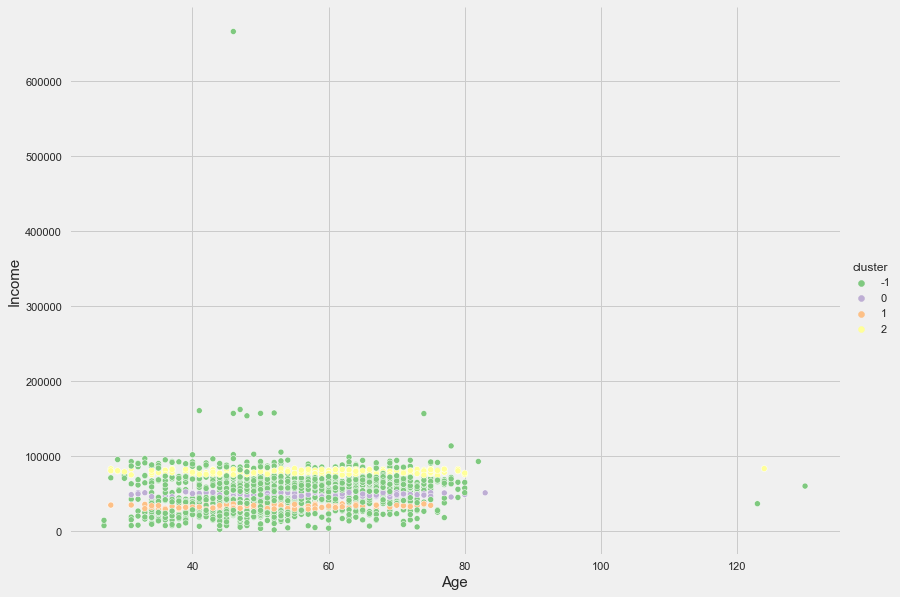

In [54]:
##visualizing optic results on original data

data_optics = Data.copy()
data_optics['cluster'] = optics.labels_
sns.relplot(data = data_optics ,x='Age' , y  ='Income', hue='cluster', palette='Accent' ,kind='scatter', height=8.27, aspect = 11.7/8.27)
#plt.scatter(centroids[:, 0], centroids[:,1], c='red', s=50)
plt.xlabel("Age",fontsize=15)
plt.ylabel("Income",fontsize=15)
plt.xlabel("Age",fontsize=15)
plt.ylabel("Income",fontsize=15)

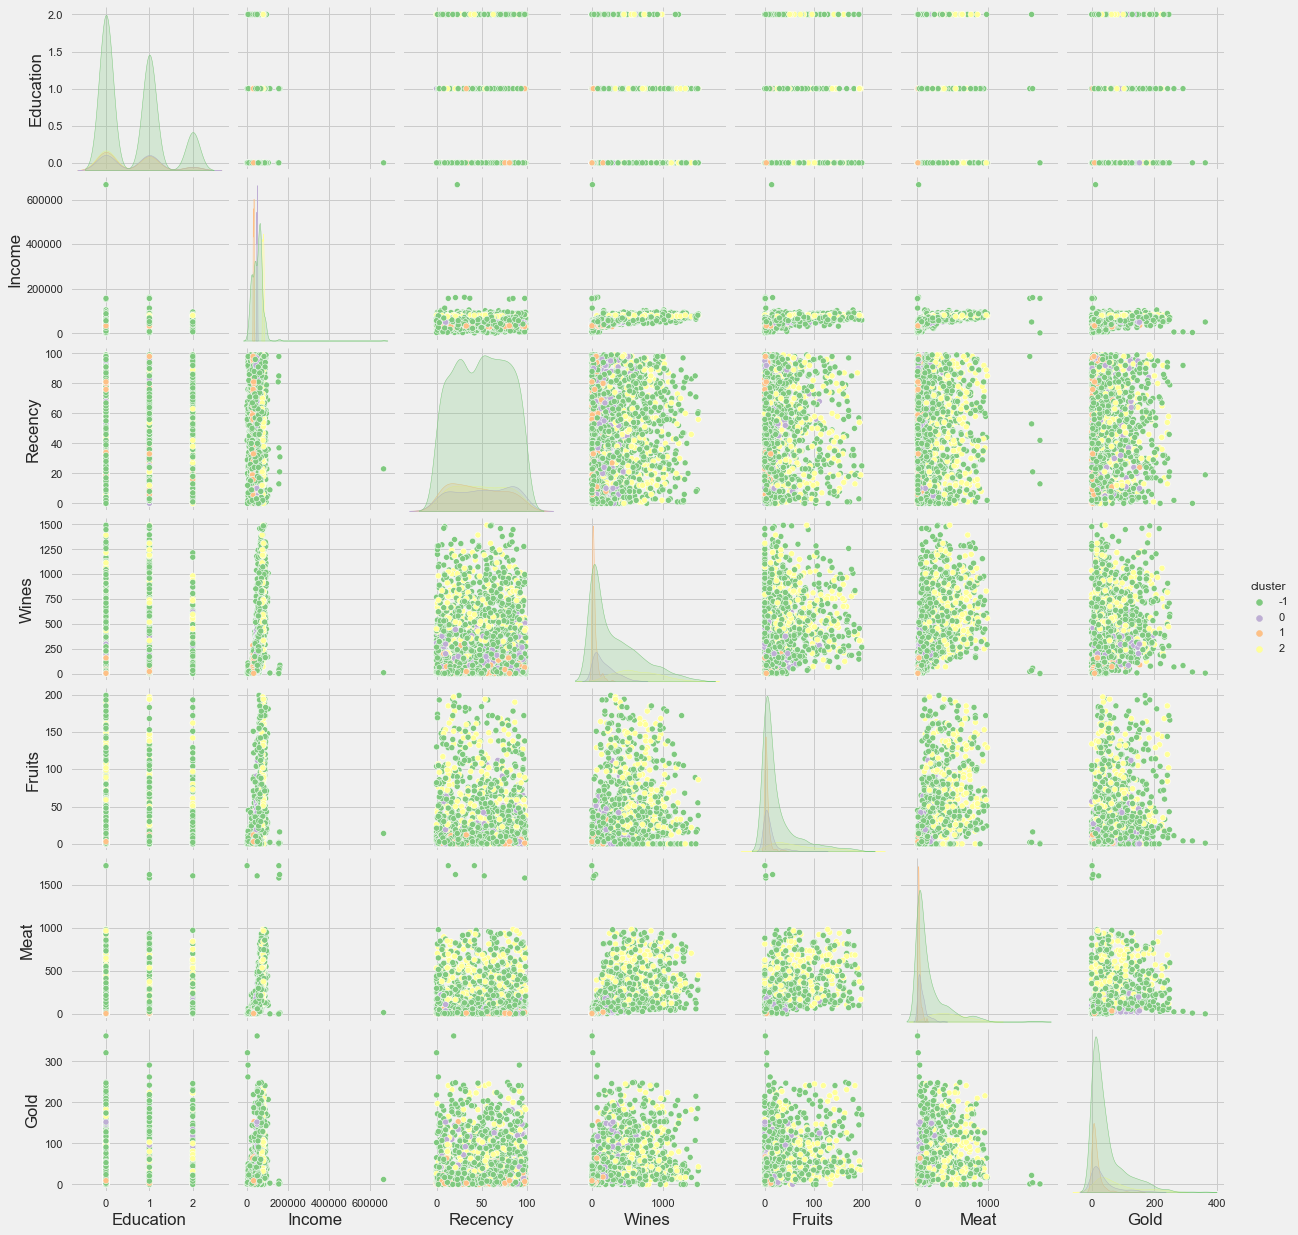

In [55]:
##visualizing optic results on original data of all or some columns
best_cols = ["Education", "Income", "Recency","Wines", "Fruits", "Meat","Gold","cluster"]
sns.pairplot(data_optics [ best_cols ], hue="cluster",palette='Accent') 

In [56]:
## method GaussianMixture
from sklearn.mixture import GaussianMixture

# Initialize the GMM model
gmm = GaussianMixture(n_components=3, random_state=0)

# Fit the GMM model to the data
gmm.fit(Data)

# Predict the cluster labels for the data points
labels = gmm.predict(Data)

# Print the number of clusters
n_clusters = len(np.unique(labels))
print(f"Number of clusters: {n_clusters}")

Number of clusters: 3


Text(14.315430614909786, 0.5, 'Income')

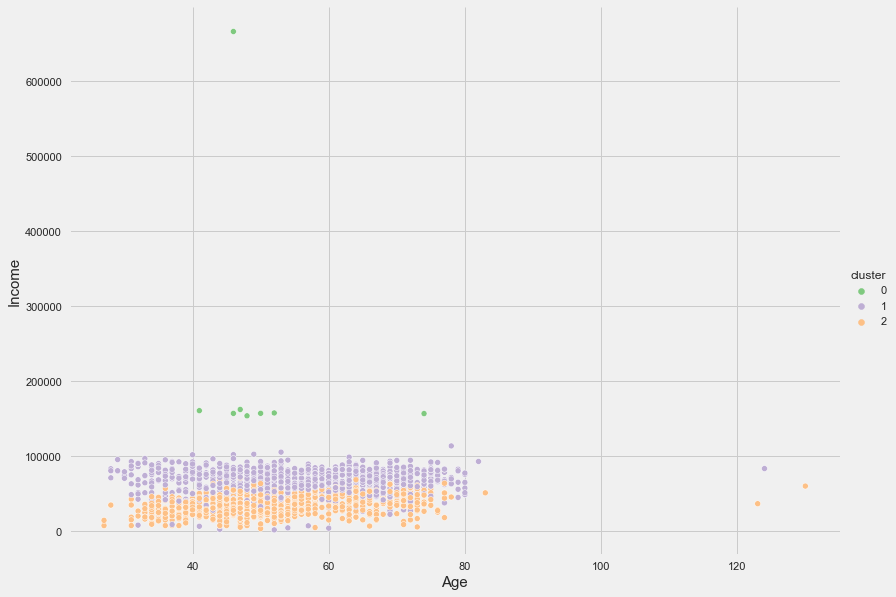

In [58]:
##visualizing GaussianMixture results on original data
data_gmm = Data.copy()
data_gmm['cluster'] = gmm.predict(Data)
sns.relplot(data = data_gmm ,x='Age' , y  ='Income', hue='cluster', palette='Accent' ,kind='scatter', height=8.27, aspect = 11.7/8.27)
#plt.scatter(centroids[:, 0], centroids[:,1], c='red', s=50)
plt.xlabel("Age",fontsize=15)
plt.ylabel("Income",fontsize=15)
plt.xlabel("Age",fontsize=15)
plt.ylabel("Income",fontsize=15)

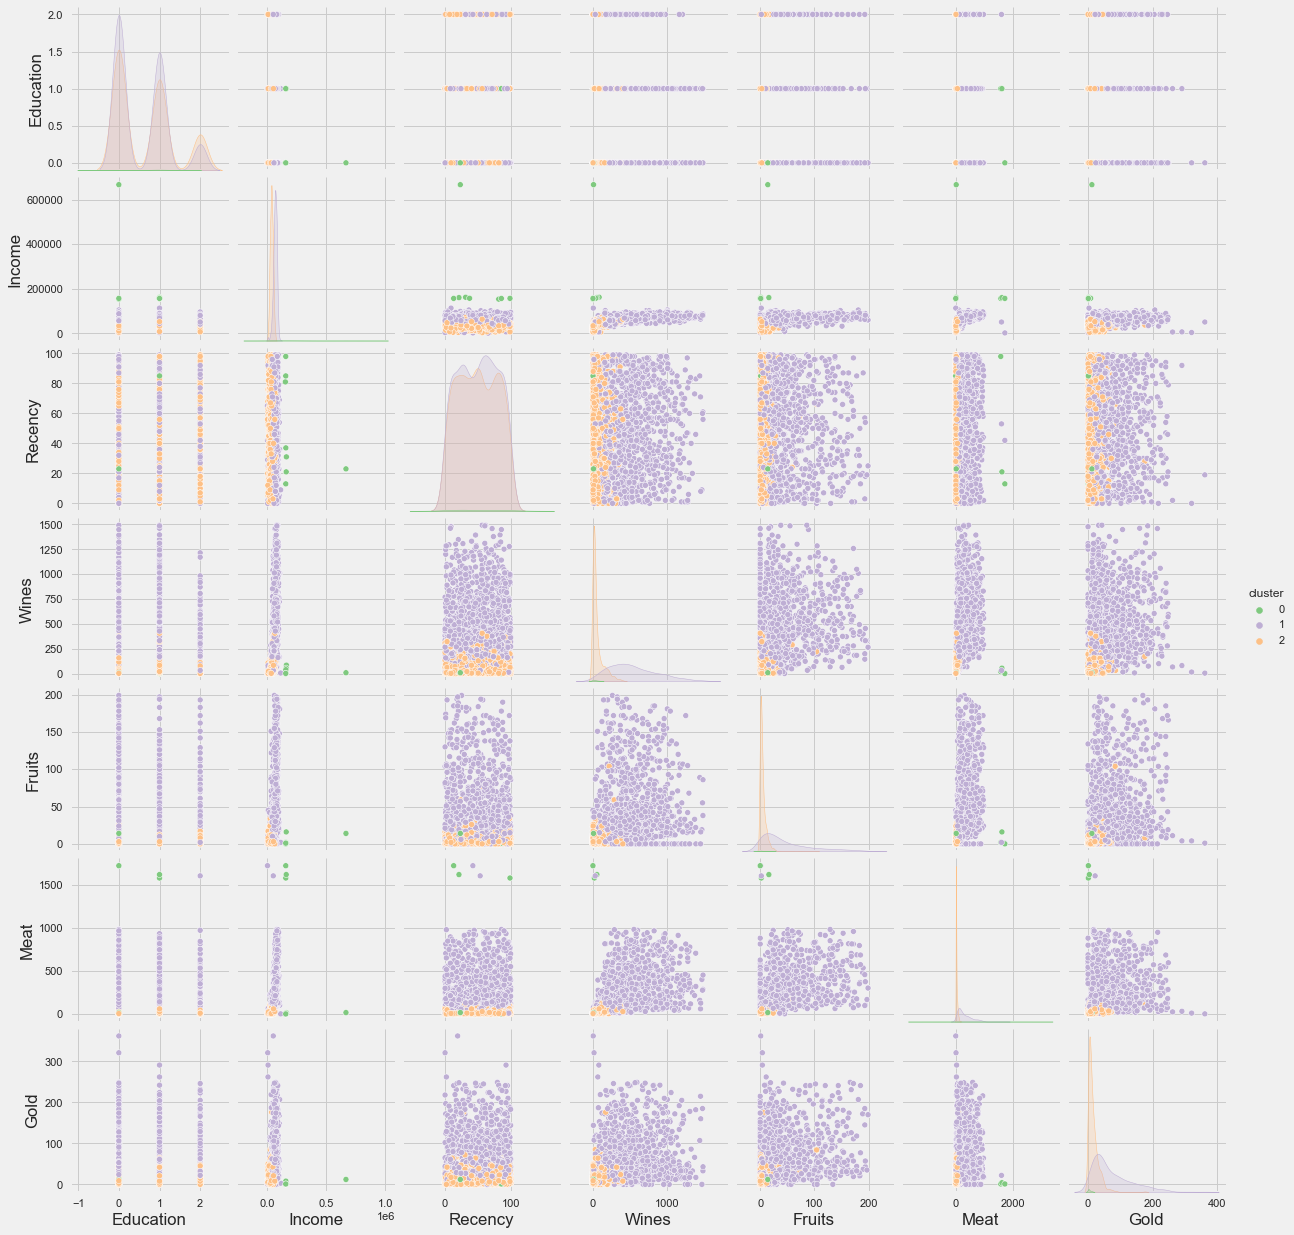

In [59]:
####visualizing GaussianMixture results on original data of some coulumns
best_cols = ["Education", "Income", "Recency","Wines", "Fruits", "Meat","Gold","cluster"]
sns.pairplot(data_gmm [ best_cols ], hue="cluster",palette='Accent') 

In [49]:
## method MeanShift
from sklearn.cluster import MeanShift, estimate_bandwidth
# Estimate the bandwidth (bandwidth determines the size of the kernel)
bandwidth = estimate_bandwidth(Data, quantile=0.2, n_samples=100)

# Initialize the Mean Shift model
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)

# Fit the Mean Shift model to the data
ms.fit(Data)
# Extract the cluster labels and cluster centers
labels = ms.labels_
cluster_centers = ms.cluster_centers_

# Print the number of clusters
n_clusters = len(np.unique(labels))
print(f"Number of clusters: {n_clusters}")

Number of clusters: 4


Text(14.315430614909786, 0.5, 'Income')

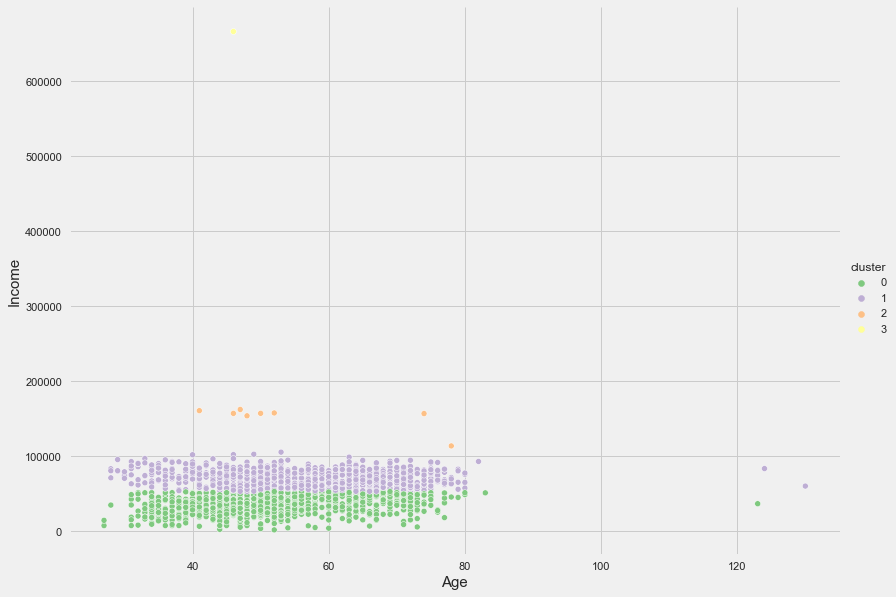

In [41]:
##visualizing MeanShift results on original data
data_ms = Data.copy()
data_ms['cluster'] = ms.labels_
sns.relplot(data = data_ms ,x='Age' , y  ='Income', hue='cluster', palette='Accent' ,kind='scatter', height=8.27, aspect = 11.7/8.27)
#plt.scatter(centroids[:, 0], centroids[:,1], c='red', s=50)
plt.xlabel("Age",fontsize=15)
plt.ylabel("Income",fontsize=15)
plt.xlabel("Age",fontsize=15)
plt.ylabel("Income",fontsize=15)

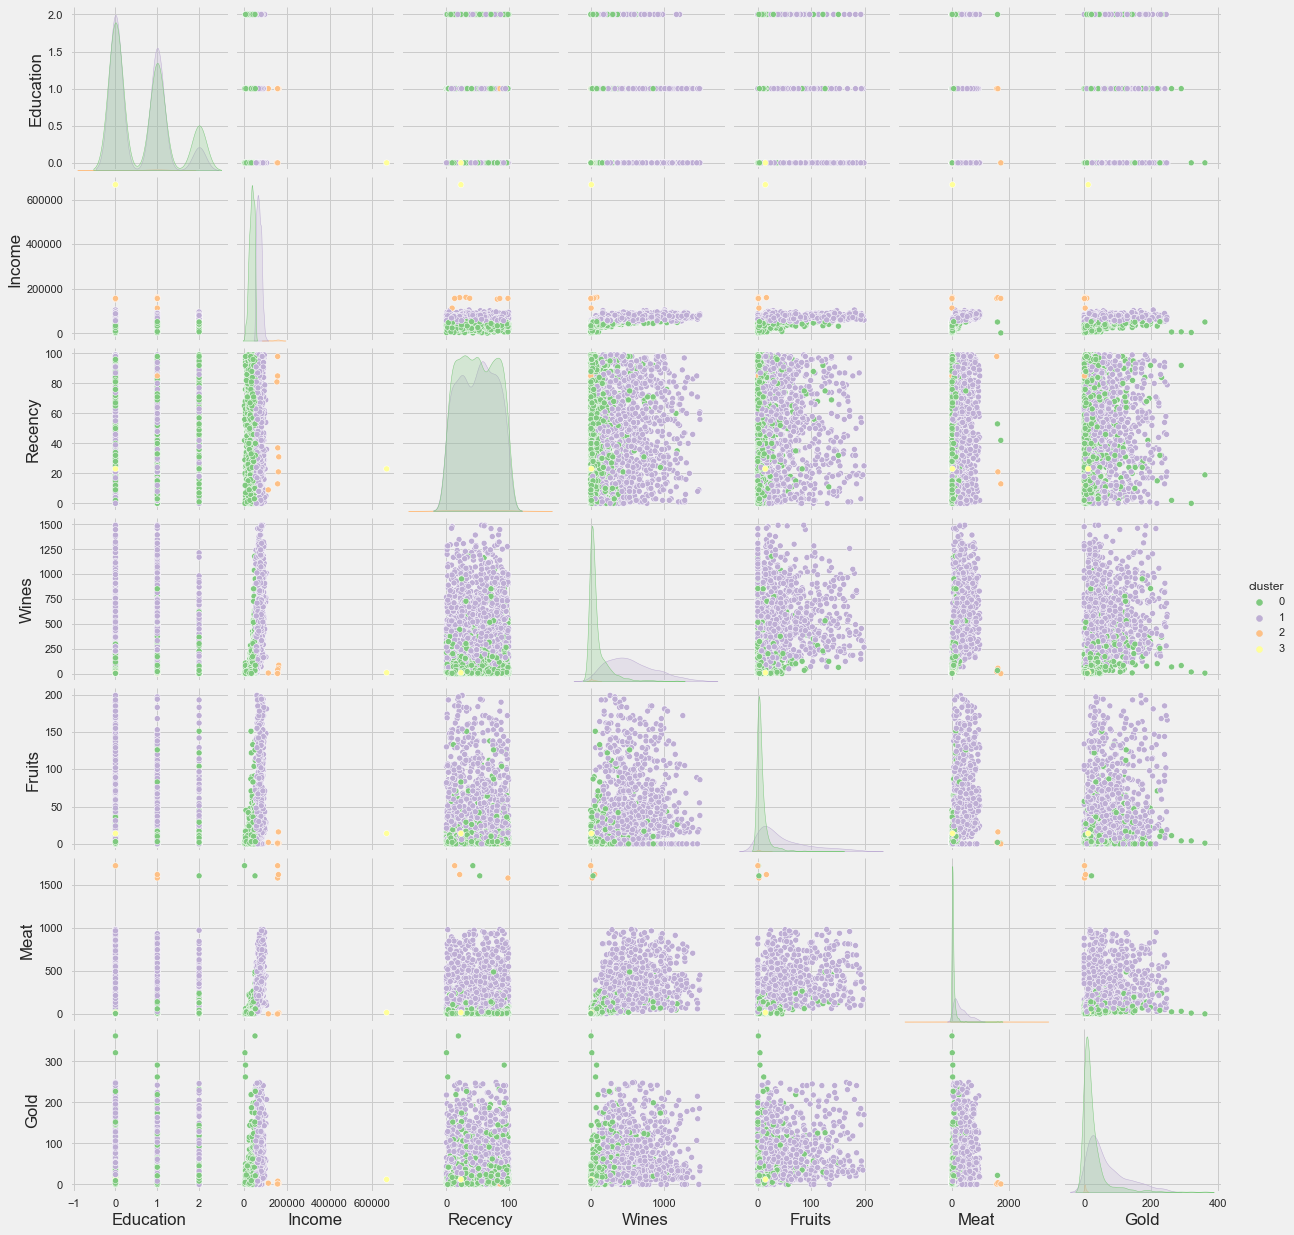

In [42]:
##visualizing MeanShift results on original data of some coulumns
best_cols = ["Education", "Income", "Recency","Wines", "Fruits", "Meat","Gold","cluster"]
sns.pairplot(data_ms [ best_cols ], hue="cluster",palette='Accent') 

In [43]:
## method Birch
from sklearn.cluster import Birch
# Initialize the BIRCH model
birch = Birch(n_clusters=4)

# Fit the BIRCH model to the data
birch.fit(Data)

# Extract the cluster labels
labels = birch.labels_

# Print the number of clusters
n_clusters = len(np.unique(labels))
print(f"Number of clusters: {n_clusters}")

Number of clusters: 4


Text(14.315430614909786, 0.5, 'Income')

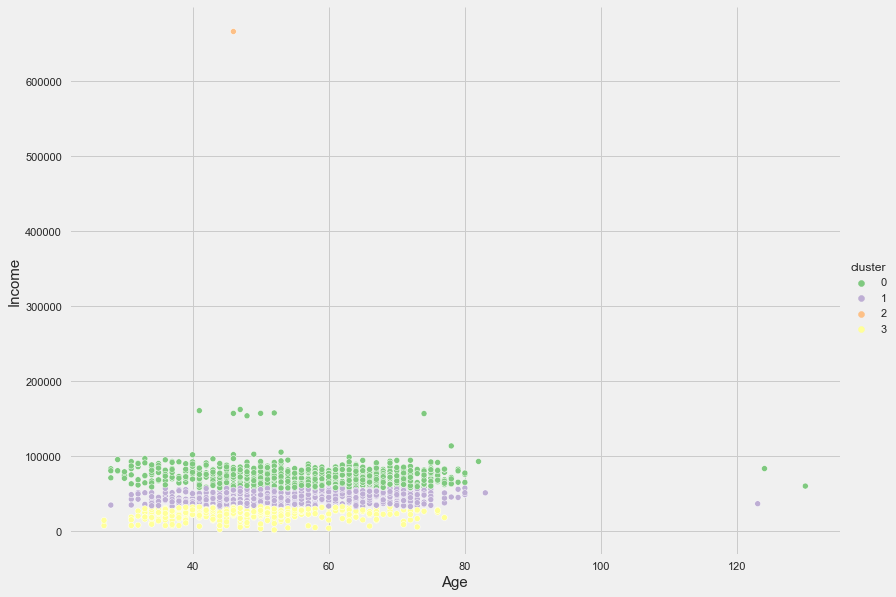

In [44]:
##visualizing Birch results on original data

data_birch = Data.copy()
data_birch['cluster'] = birch.labels_
sns.relplot(data = data_birch ,x='Age' , y  ='Income', hue='cluster', palette='Accent' ,kind='scatter', height=8.27, aspect = 11.7/8.27)
#plt.scatter(centroids[:, 0], centroids[:,1], c='red', s=50)
plt.xlabel("Age",fontsize=15)
plt.ylabel("Income",fontsize=15)
plt.xlabel("Age",fontsize=15)
plt.ylabel("Income",fontsize=15)

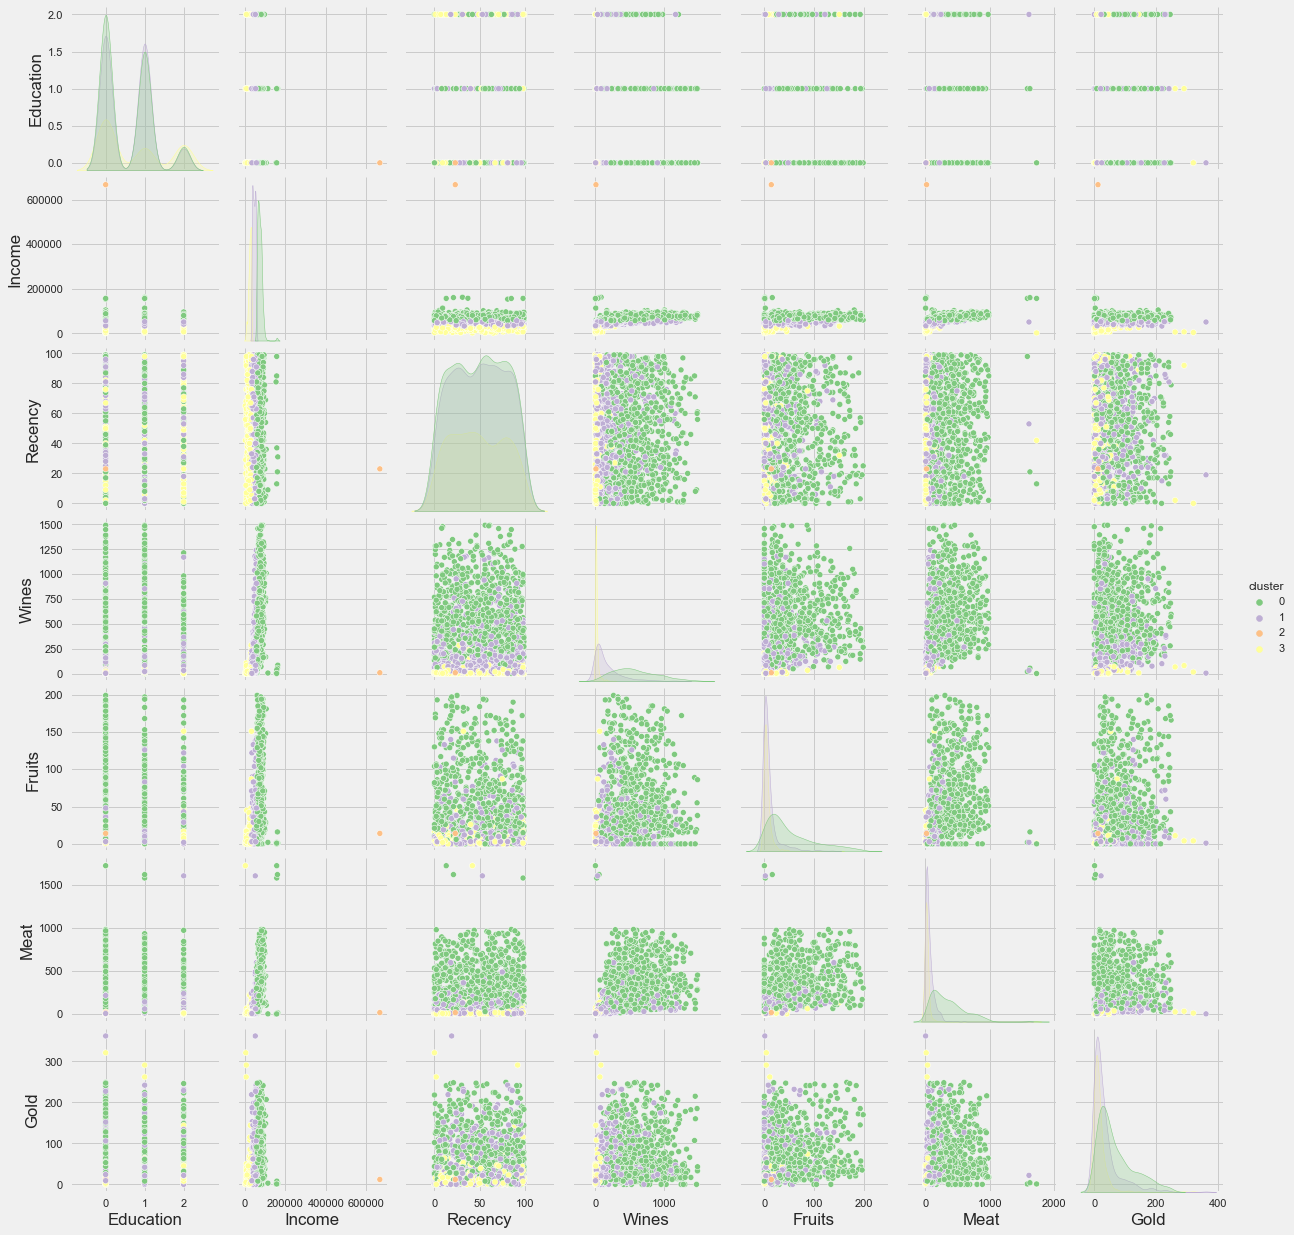

In [45]:
##visualizing birch results on original data of some coulumns

best_cols = ["Education", "Income", "Recency","Wines", "Fruits", "Meat","Gold","cluster"]
sns.pairplot(data_birch [ best_cols ], hue="cluster",palette='Accent') 